In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("student_mental_health_cleaned.csv")

In [22]:
df.head()

,Timestamp,Gender,Age,Course,Year,CGPA,Marital status,Depression,Anxiety,Panic Attack,...,Month,Day of Week,Science,Arts,CGPA Rank,A+,A,B,C,D
0,2020-08-07 12:02:00,0,18.0,Science,1,3.00 - 3.49,0,1,0,1,...,8,Fri,1,0,3.49,0,1,0,0,0
1,2020-08-07 12:04:00,1,21.0,Arts,2,3.00 - 3.49,0,0,1,0,...,8,Fri,0,1,3.49,0,1,0,0,0
2,2020-08-07 12:05:00,1,19.0,Science,1,3.00 - 3.49,0,1,1,1,...,8,Fri,1,0,3.49,0,1,0,0,0
3,2020-08-07 12:06:00,0,22.0,Arts,3,3.00 - 3.49,1,1,0,0,...,8,Fri,0,1,3.49,0,1,0,0,0
4,2020-08-07 12:13:00,1,23.0,Science,4,3.00 - 3.49,0,0,0,0,...,8,Fri,1,0,3.49,0,1,0,0,0


In [217]:
df.columns

Index(['Timestamp', 'Gender', 'Age', 'Course', 'Year', 'CGPA',
       'Marital status', 'Depression', 'Anxiety', 'Panic Attack',
       'Seeked Help', 'Hour', 'Month', 'Day of Week', 'Science', 'Arts',
       'CGPA Rank', 'A+', 'A', 'B', 'C', 'D', 'Mental State', 'cat_mental'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       101 non-null    object 
 1   Gender          101 non-null    int64  
 2   Age             101 non-null    float64
 3   Course          101 non-null    object 
 4   Year            101 non-null    int64  
 5   CGPA            101 non-null    object 
 6   Marital status  101 non-null    int64  
 7   Depression      101 non-null    int64  
 8   Anxiety         101 non-null    int64  
 9   Panic Attack    101 non-null    int64  
 10  Seeked Help     101 non-null    int64  
 11  Hour            101 non-null    int64  
 12  Month           101 non-null    int64  
 13  Day of Week     101 non-null    object 
 14  Science         101 non-null    int64  
 15  Arts            101 non-null    int64  
 16  CGPA Rank       101 non-null    float64
 17  A+              101 non-null    int

In [25]:
df.describe()

,Gender,Age,Year,Marital status,Depression,Anxiety,Panic Attack,Seeked Help,Hour,Month,Science,Arts,CGPA Rank,A+,A,B,C,D
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.257426,20.534653,1.970297,0.158416,0.346535,0.336634,0.326733,0.059406,14.138614,7.821782,0.603960,0.396040,3.633366,0.475248,0.425743,0.039604,0.019802,0.039604
std,0.439397,2.484208,0.994540,0.366952,0.478239,0.474915,0.471358,0.237562,3.003430,0.497916,0.491512,0.491512,0.473380,0.501878,0.496921,0.196000,0.140014,0.196000
min,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,7.000000,0.000000,0.000000,1.990000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,3.490000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,19.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,1.000000,0.000000,3.490000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,23.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,16.000000,8.000000,1.000000,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,24.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.000000,9.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [202]:
def get_values(row):  
    if row['Depression'] == 1:
        return 1
    elif row['Anxiety'] == 1:
        return 1
    elif row['Panic Attack'] == 1:
        return 1
    return 0

In [203]:
df['Mental State'] = df.apply(lambda row: get_values(row), axis=1)

In [216]:
def get_cat(row):  
    if row['Depression'] == 1:
        return 'Depressed'
    elif row['Anxiety'] == 1:
        return 'Anxiety'
    elif row['Panic Attack'] == 1:
        return 'Panic Attacks'
    return 'No Issues'
df['cat_mental'] = df.apply(lambda row: get_cat(row), axis=1)

<AxesSubplot:xlabel='Mental State', ylabel='count'>

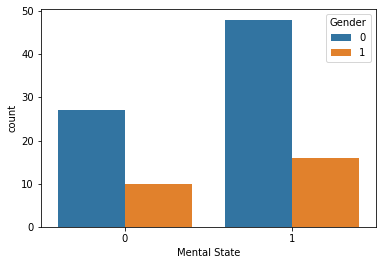

In [209]:
sns.countplot(x='Mental State', hue = 'Gender', data = df)

[Text(0.5, 1.0, '0 = Female, 1 = Male')]

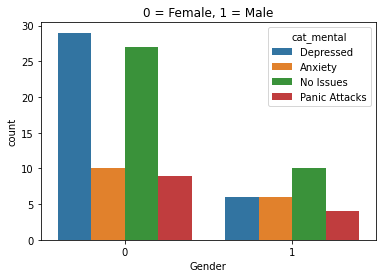

In [218]:
sns.countplot(x='Gender', hue = 'cat_mental', data = df).set(title = '0 = Female, 1 = Male')

<AxesSubplot:xlabel='CGPA Rank', ylabel='count'>

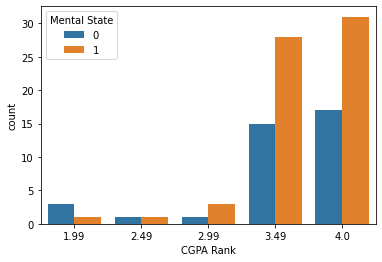

In [215]:
sns.countplot(x='CGPA Rank', hue ='Mental State', data = df)

<AxesSubplot:xlabel='Age', ylabel='count'>

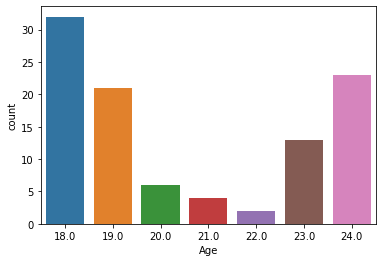

In [154]:
sns.countplot(x='Age', data = df)

<AxesSubplot:xlabel='Course', ylabel='count'>

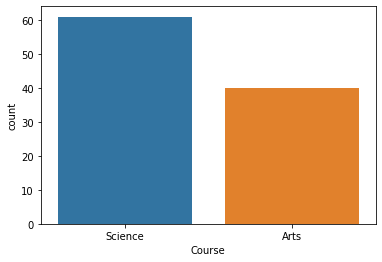

In [155]:
sns.countplot(x='Course', data = df)

[Text(0.5, 1.0, '0 = Not Married, 1 = Married')]

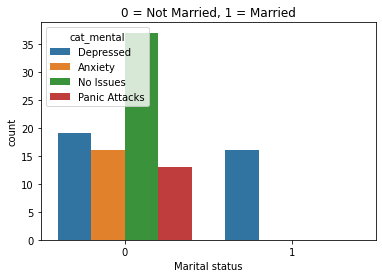

In [219]:
sns.countplot(x='Marital status', hue = 'cat_mental',data = df).set(title = '0 = Not Married, 1 = Married')

<AxesSubplot:xlabel='Mental State', ylabel='count'>

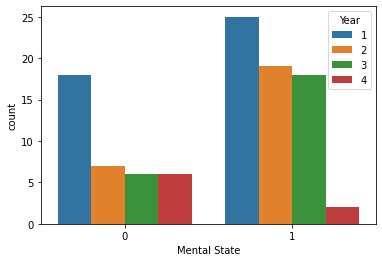

In [239]:
sns.countplot(x='Mental State', hue = 'Year', data = df)

<AxesSubplot:>

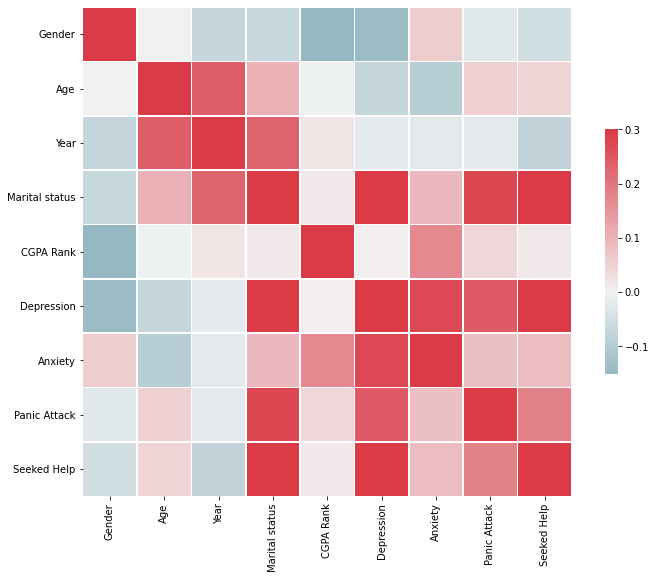

In [56]:
f, ax = plt.subplots(figsize=(12, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Gender', 'Age', 'Year', 'Marital status', 'CGPA Rank', 'Depression', 'Anxiety', 'Panic Attack', 'Seeked Help']].corr(), 
            cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

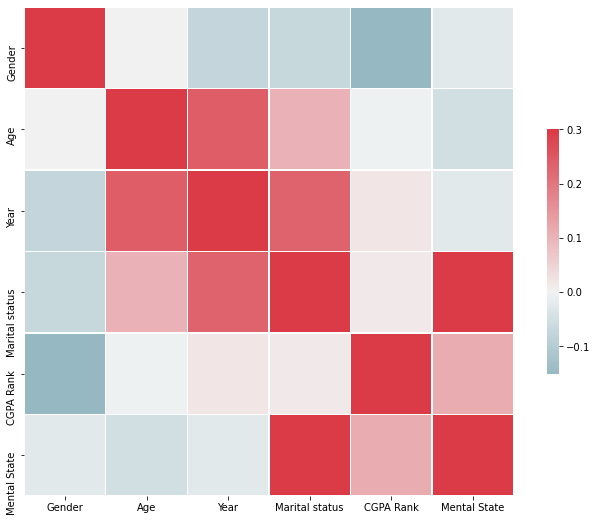

In [226]:
f, ax = plt.subplots(figsize=(12, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Gender', 'Age', 'Year', 'Marital status', 'CGPA Rank','Mental State']].corr(), 
            cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:xlabel='Marital status', ylabel='Depression'>

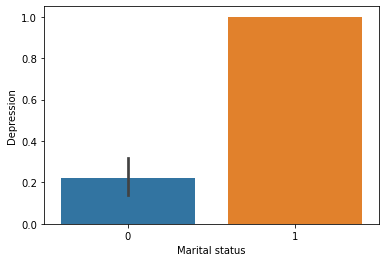

In [151]:
sns.barplot(x='Marital status', y= 'Depression', data = df)

<AxesSubplot:xlabel='Anxiety', ylabel='Depression'>

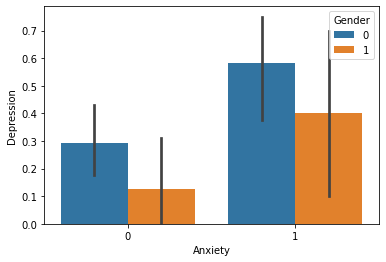

In [148]:
sns.barplot(x='Anxiety', y= 'Depression', hue = 'Gender', data = df)

<AxesSubplot:xlabel='Seeked Help', ylabel='Marital status'>

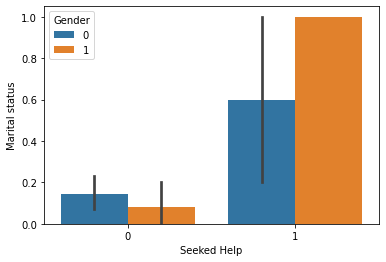

In [149]:
sns.barplot(x='Seeked Help', y= 'Marital status', hue= 'Gender', data = df)

<AxesSubplot:xlabel='Course', ylabel='Depression'>

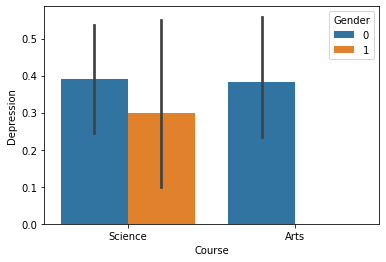

In [159]:
sns.barplot(x='Course', y='Depression', hue = 'Gender', data = df)

<AxesSubplot:xlabel='Age', ylabel='Marital status'>

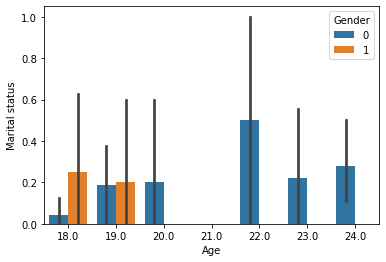

In [213]:
sns.barplot(x='Age', y='Marital status', hue= 'Gender', data = df)

In [237]:
df.groupby(['Mental State', 'Gender']).size()

Mental State  Gender
0             0         27
              1         10
1             0         48
              1         16
dtype: int64

In [233]:
df['Gender'].value_counts()

0    75
1    26
Name: Gender, dtype: int64